In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
train = pd.read_csv('train.csv')
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [36]:
train.shape

(175296, 18)

In [37]:
train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [38]:
train.duplicated().sum()

0

In [39]:
test = pd.read_csv('test.csv')
test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [40]:
test.shape

(17520, 18)

In [41]:
test.isnull().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [43]:
train[train['Hour'] == 9].head(5)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
18,2009,1,1,9,0,0,0,0,0,-1.0,0.0,1010,88.32,134.92,0.541,49.8,2.2,0
19,2009,1,1,9,30,0,0,0,0,-1.0,0.0,1010,88.33,128.56,0.544,49.8,2.2,0
66,2009,1,2,9,0,0,0,0,4,4.0,5.0,1000,100.00,134.99,2.134,158.2,1.6,0
67,2009,1,2,9,30,0,0,0,3,4.0,5.0,1000,100.00,128.63,2.176,158.2,1.4,0
114,2009,1,3,9,0,0,0,0,1,11.0,12.0,1000,100.00,135.05,2.646,222.3,1.6,0


Text(0, 0.5, 'Clearsky DNI')

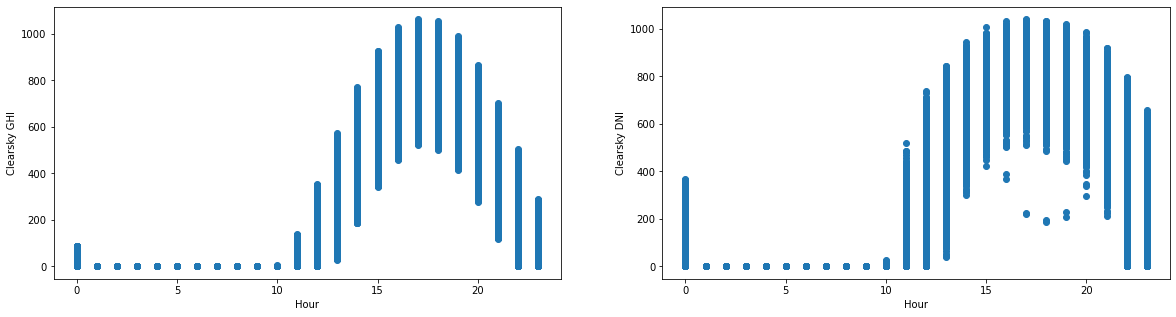

In [44]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(train['Hour'], train['Clearsky GHI'])
ax1.set_xlabel('Hour')
ax1.set_ylabel('Clearsky GHI')
ax2.scatter(train['Hour'], train['Clearsky DNI'])
ax2.set_xlabel('Hour')
ax2.set_ylabel('Clearsky DNI')

Text(0, 0.5, 'Clearsky DHI')

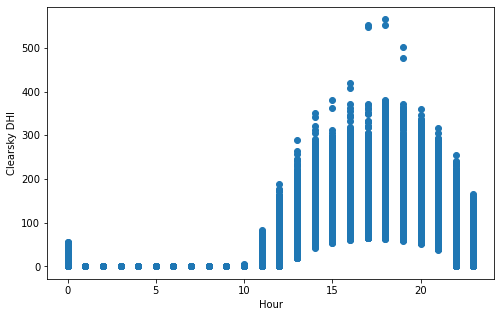

In [45]:
plt.figure(figsize= (8, 5))
plt.scatter(train['Hour'], train['Clearsky DHI'])
plt.xlabel('Hour')
plt.ylabel('Clearsky DHI')

In [46]:
combined = pd.concat([train, test], axis = 0)
combined.shape

(192816, 18)

In [47]:
combined['time'] = combined['Hour']*60 + combined['Minute']

In [48]:
combined['pro_unit'] = combined['Temperature'] / combined['Relative Humidity']
combined['volume'] = combined['Temperature'] / combined['Pressure']

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc8be83a60>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc8bec85e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc8be64490>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8bf0c160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8bf28700>],
 'means': []}

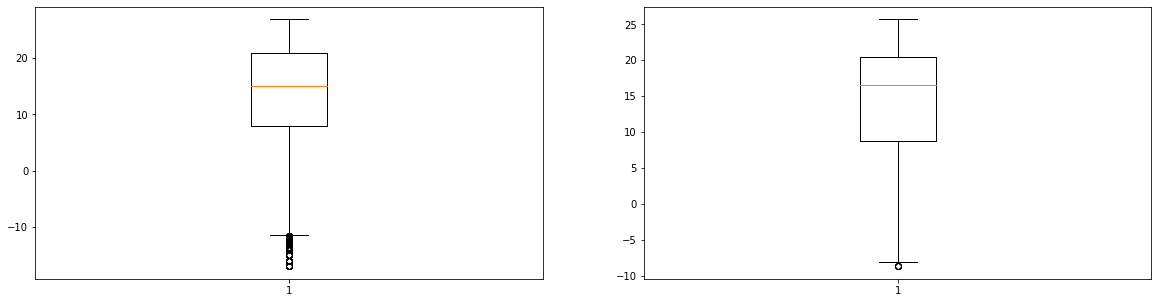

In [49]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Dew Point'])
ax2.boxplot(test['Dew Point'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc855fdf10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc85607610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc855fdbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc85607cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc85613070>],
 'means': []}

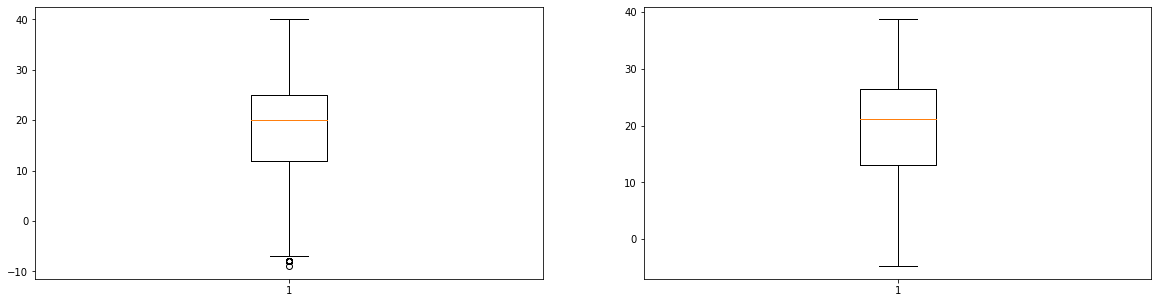

In [50]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Temperature'])
ax2.boxplot(test['Temperature'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc856b3a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc856bc100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc856b3670>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc856bc7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc856bcb20>],
 'means': []}

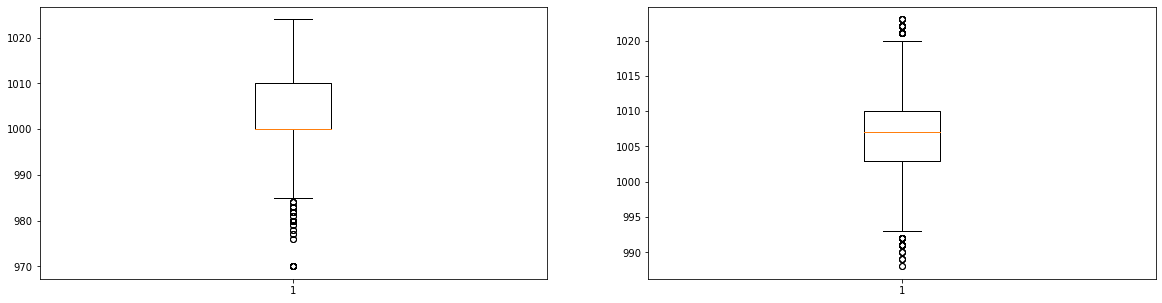

In [51]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Pressure'])
ax2.boxplot(test['Pressure'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc85a83f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc85a8f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc85a83be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc85a8fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc85a990a0>],
 'means': []}

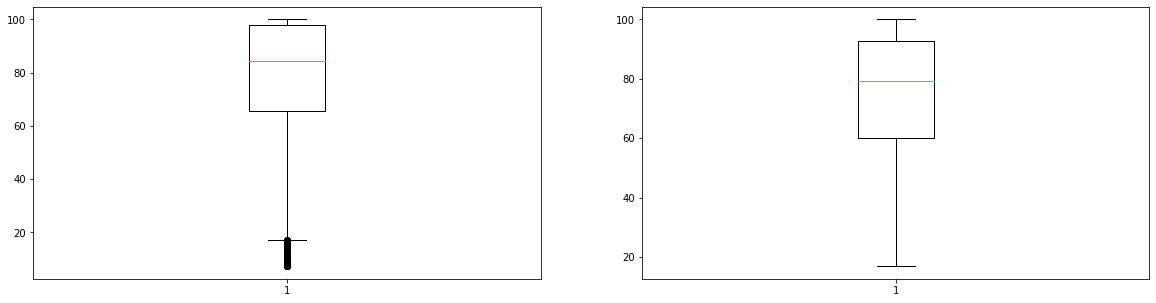

In [52]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Relative Humidity'])
ax2.boxplot(test['Relative Humidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc85c184c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc85c18b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc85c18160>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc85c22280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc85c225e0>],
 'means': []}

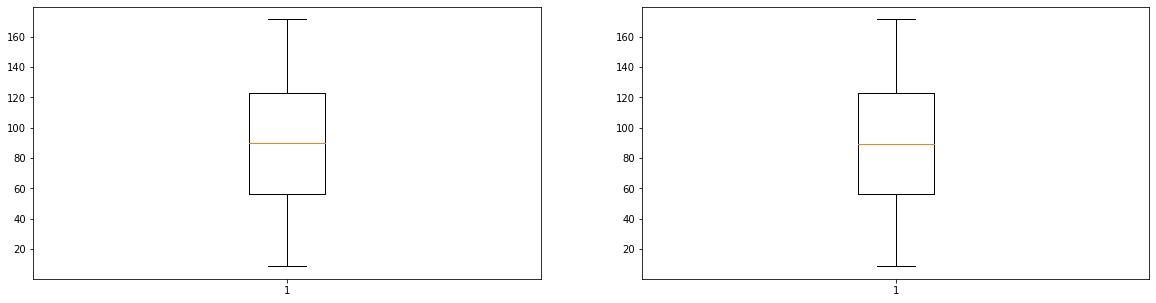

In [53]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Solar Zenith Angle'])
ax2.boxplot(test['Solar Zenith Angle'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc864119a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc8641a0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc86411640>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8641a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8641aac0>],
 'means': []}

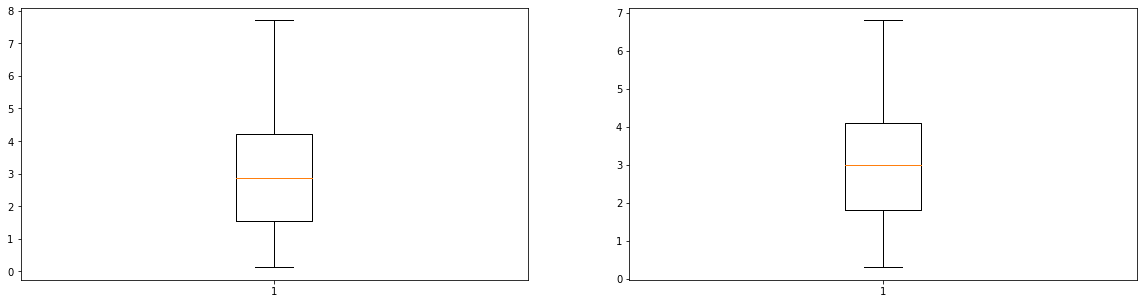

In [54]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Precipitable Water'])
ax2.boxplot(test['Precipitable Water'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc86492460>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc86492b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc86492100>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8649e220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8649e580>],
 'means': []}

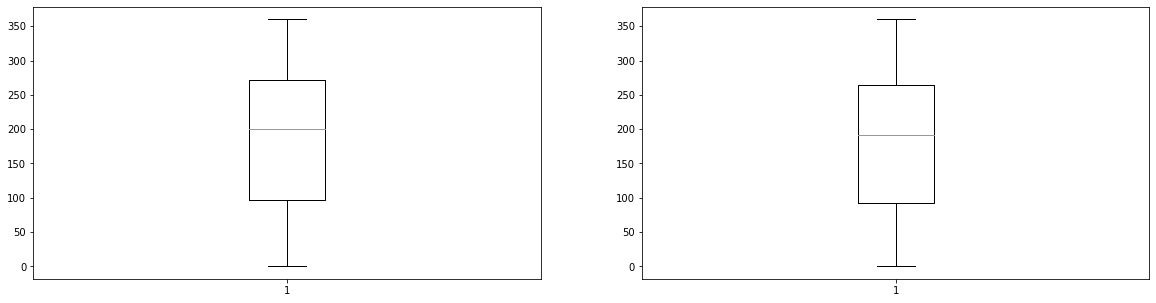

In [55]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Wind Direction'])
ax2.boxplot(test['Wind Direction'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc86542bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc8654e2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc86542850>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8654e970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8654ecd0>],
 'means': []}

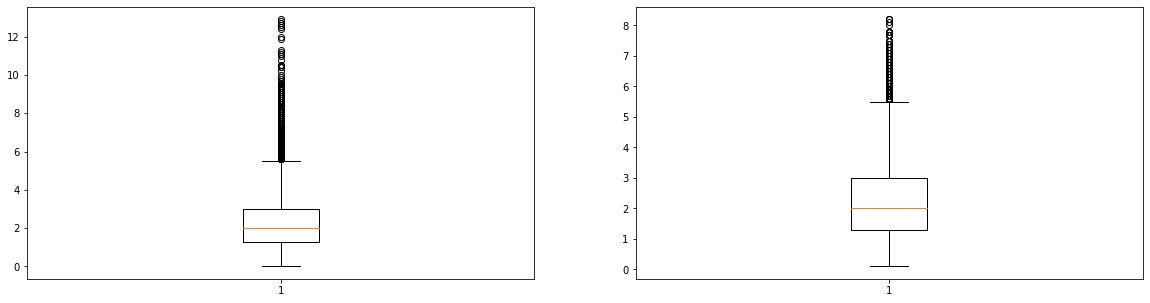

In [56]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Wind Speed'])
ax2.boxplot(test['Wind Speed'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc865f3f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc86600610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc865f3bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc86600cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8660d070>],
 'means': []}

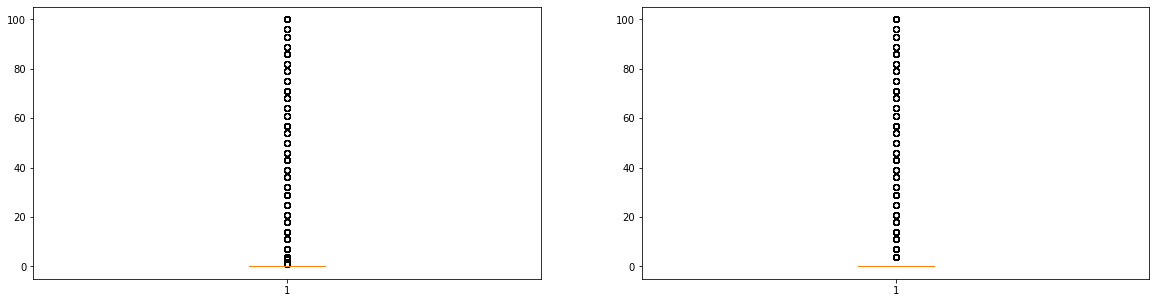

In [57]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(train['Fill Flag'])
ax2.boxplot(test['Fill Flag'])

<AxesSubplot:xlabel='Fill Flag', ylabel='Count'>

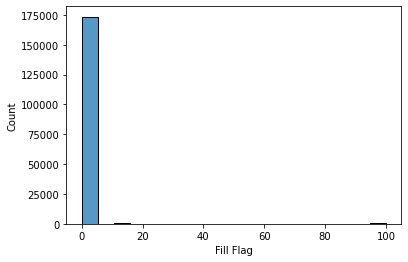

In [58]:
sns.histplot(train['Fill Flag'])

<AxesSubplot:xlabel='Fill Flag', ylabel='Count'>

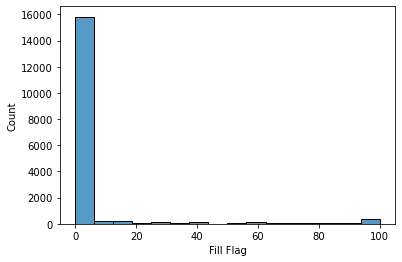

In [59]:
sns.histplot(test['Fill Flag'])

In [60]:
newtrain = combined.iloc[0:175296, :]
newtest = combined.iloc[175296: , :]

In [61]:
newtrain = newtrain.drop(['Hour', 'Minute', 'Fill Flag'], axis = 1)
newtest = newtest.drop(['Hour', 'Minute', 'Fill Flag'], axis = 1)

In [62]:
newtrain.shape

(175296, 18)

In [63]:
newtest.shape

(17520, 18)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

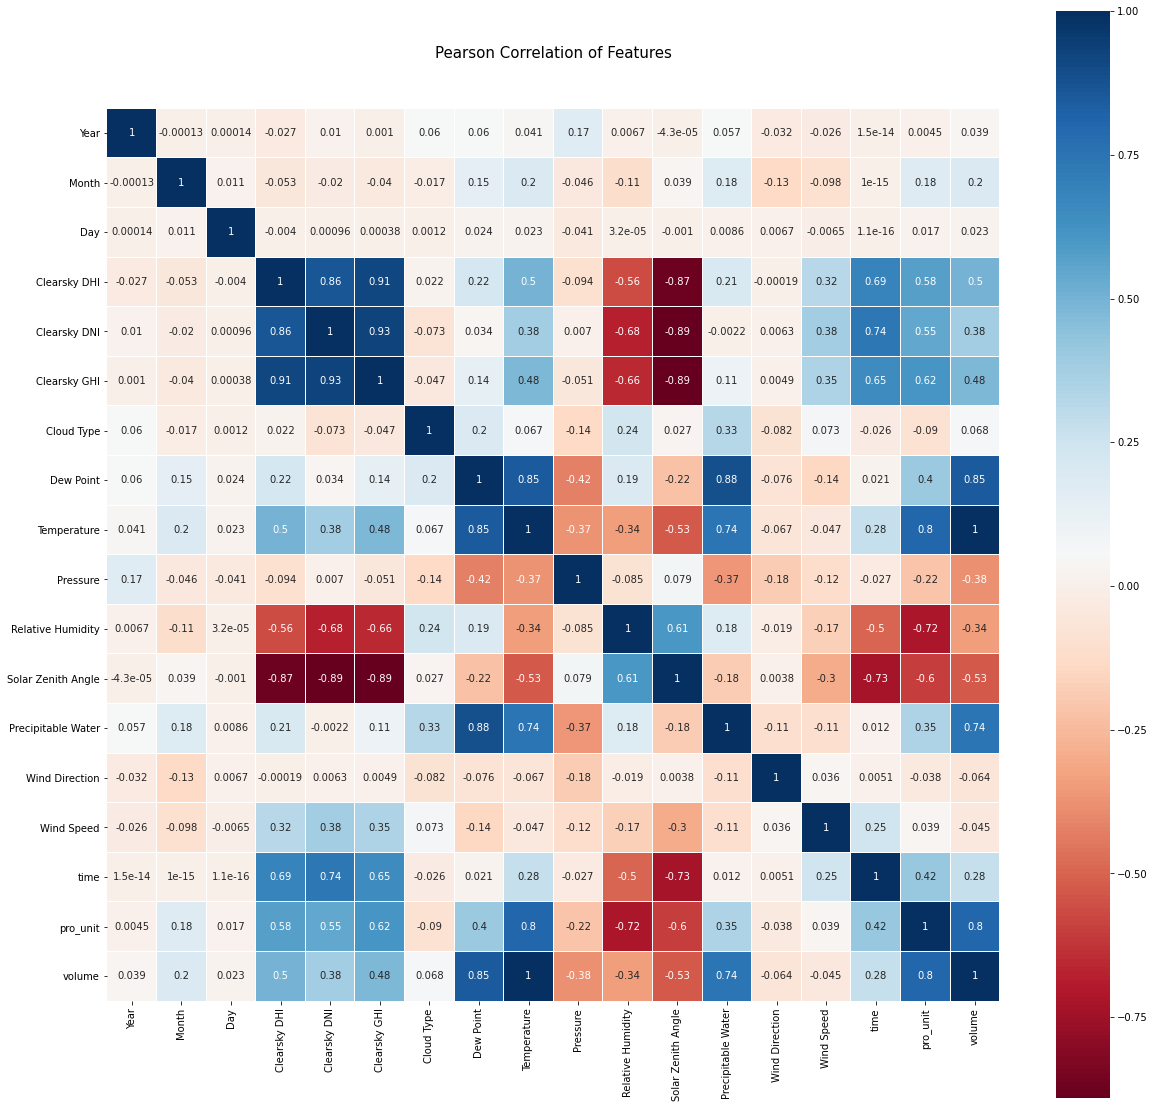

In [64]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(newtrain.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [66]:
def outlier_trim(dataframe, column_name):
    for i in dataframe[column_name]:
        q1 = dataframe[column_name].quantile(0.25)
        q3 = dataframe[column_name].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        if i > upper or i < lower:
            dataframe[column_name] = dataframe[column_name].replace(i, np.median(dataframe[column_name]))

In [67]:
outlier_trim(newtest, 'Dew Point')
outlier_trim(newtest, 'Pressure')

In [68]:
outlier_trim(newtest, 'Wind Speed')
##outlier_trim(newtest, 'Fill Flag')

In [69]:
outlier_trim(newtrain, 'Dew Point')
outlier_trim(newtrain, 'Pressure')

In [70]:
outlier_trim(newtrain, 'Temperature')
outlier_trim(newtrain, 'Relative Humidity')

In [71]:
outlier_trim(newtrain, 'Wind Speed')
##outlier_trim(newtrain, 'Fill Flag')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc87079eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc870835b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc87079b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc87083c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc87083fd0>],
 'means': []}

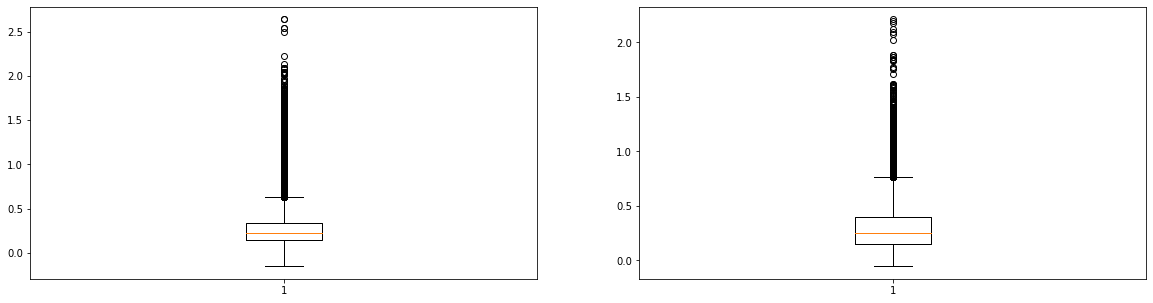

In [72]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['pro_unit'])
ax2.boxplot(newtest['pro_unit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc87122af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc8712e1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc87122790>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc8712e8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc8712ec10>],
 'means': []}

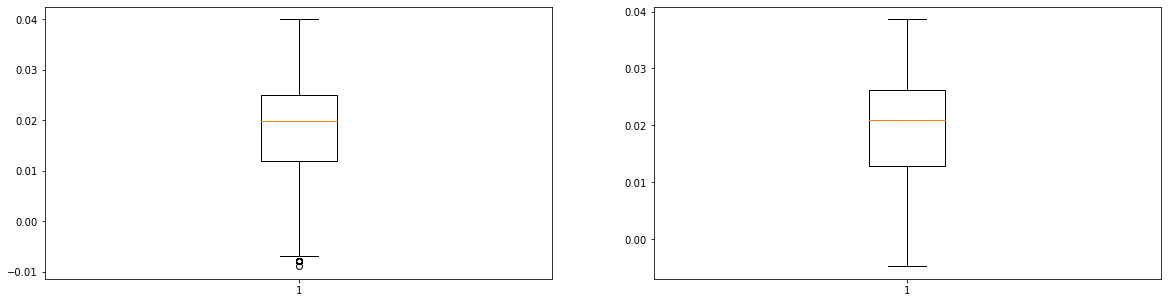

In [73]:
fig = plt.figure(figsize= (20, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.boxplot(newtrain['volume'])
ax2.boxplot(newtest['volume'])

In [74]:
outlier_trim(newtrain, 'pro_unit')
outlier_trim(newtrain, 'volume')

In [75]:
outlier_trim(newtest, 'pro_unit')

In [108]:
newtrain.head()

,Year,Month,Day,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,time,pro_unit,volume
0,2009,1,1,0.0,0.0,0.0,0,0.0,5.0,1010.0,75.34,106.15,0.499,346.1,3.1,0,0.066366,0.00495
1,2009,1,1,0.0,0.0,0.0,0,1.0,5.0,1010.0,80.81,112.28,0.490,346.1,3.1,30,0.061874,0.00495
2,2009,1,1,0.0,0.0,0.0,4,0.0,5.0,1010.0,78.27,118.50,0.482,347.9,3.2,60,0.063881,0.00495
3,2009,1,1,0.0,0.0,0.0,4,0.0,4.0,1010.0,78.27,124.78,0.478,347.9,3.1,90,0.051105,0.00396
4,2009,1,1,0.0,0.0,0.0,4,0.0,4.0,1010.0,76.45,131.12,0.475,350.0,3.0,120,0.052322,0.00396


In [109]:
 newtest.head()

,Year,Month,Day,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,time,pro_unit,volume
0,2019,1,1,NaN,NaN,NaN,7,18.4,18.8,1008.0,97.70,106.23,3.5,190.0,2.3,0,0.192426,0.018651
1,2019,1,1,NaN,NaN,NaN,3,18.4,18.6,1008.0,98.92,112.36,3.5,187.0,2.5,30,0.188031,0.018452
2,2019,1,1,NaN,NaN,NaN,3,18.2,18.5,1008.0,98.35,118.58,3.5,184.0,2.8,60,0.188104,0.018353
3,2019,1,1,NaN,NaN,NaN,3,18.2,18.3,1008.0,99.58,124.86,3.5,185.0,3.0,90,0.183772,0.018155
4,2019,1,1,NaN,NaN,NaN,0,18.0,18.0,1008.0,99.71,131.20,3.6,186.0,3.1,120,0.180524,0.017857


In [110]:
x = newtrain.drop(['Clearsky DNI','Clearsky GHI'], axis = 1)
y = newtrain['Clearsky DHI']

In [111]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(mean_squared_error(y_test, y_pred))

tf.Tensor(0.162510060816596, shape=(), dtype=float64)


In [113]:
x = newtrain.drop(['Clearsky DHI','Clearsky GHI'], axis = 1)
y = newtrain['Clearsky DNI']

In [114]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(mean_squared_error(y_test, y_pred))

tf.Tensor(1.9502611617802779, shape=(), dtype=float64)


In [116]:
x = newtrain.drop(['Clearsky DNI','Clearsky DHI'], axis = 1)
y = newtrain['Clearsky GHI']

In [117]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(mean_squared_error(y_test, y_pred))

tf.Tensor(2.434582808832377, shape=(), dtype=float64)


In [122]:
x_train = newtrain.drop(['Clearsky DNI','Clearsky GHI', 'Clearsky DHI'], axis = 1)
y_train = newtrain['Clearsky DHI']
x_test = newtest.drop(['Clearsky DNI','Clearsky GHI', 'Clearsky DHI'], axis = 1)

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred1 = gab.fit(x_train, y_train).predict(x_test)

In [124]:
x_train = newtrain.drop(['Clearsky DHI','Clearsky GHI', 'Clearsky DNI'], axis = 1)
y_train = newtrain['Clearsky DNI']
x_test = newtest.drop(['Clearsky DNI','Clearsky GHI', 'Clearsky DHI'], axis = 1)

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred2 = gab.fit(x_train, y_train).predict(x_test)

In [126]:
x_train = newtrain.drop(['Clearsky DNI','Clearsky DHI', 'Clearsky GHI'], axis = 1)
y_train = newtrain['Clearsky GHI']
x_test = newtest.drop(['Clearsky DNI','Clearsky GHI', 'Clearsky DHI'], axis = 1)

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
gab = GradientBoostingRegressor()
y_pred3 = gab.fit(x_train, y_train).predict(x_test)

In [128]:
solution = pd.DataFrame({'Clearsky DHI' : y_pred1, 'Clearsky DNI' : y_pred2, 'Clearsky GHI' : y_pred3})
solution.shape

(17520, 3)

In [129]:
solution.to_csv('Solution.csv', index = False)